<a href="https://colab.research.google.com/github/lucas-pinto/NUIN443/blob/main/problemSets/NUIN443_ps5_FA%2BGPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Packages**

In [59]:
import numpy as np
import matplotlib.pyplot as plt

#Some helper functions for Gaussians
from numpy.random import normal, multivariate_normal

#Sci-kit linear factor analysis and PCA
from sklearn.decomposition import FactorAnalysis, PCA

## Factor Analysis

1) Write code to simulate data from the  factor analysis model with the following parameters, with 1 latent and 3-dimensional observations:  

$W = \begin{bmatrix} -1 \\ 1 \\ 2 \end{bmatrix}$
$\Psi = \begin{bmatrix} 10 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$

<br>

*Credit: This problem is inspired from a problem from Jonathan Pillow's Computational Neuroscience course at Princeton*

a) First, generate 2000 samples of 1-dimensional latent $z$

In [60]:
#Set the random seed so we get the same results every time
np.random.seed(1)

#Fill in below to generate samples of the latent
z = np.random.normal(loc=0, scale=1, size=2000)



In [61]:
W = np.array([-1,1,2])
chi = np.array([[10,0,0], [0,1,0], [0,0,1]])

In [62]:
#Change below code if necessary, based on the variable name you gave to Z

# Sort samples of Z in order to make visualization of the latent more obvious later on
z=np.sort(z)

b) From the latent, generate 3-dimensional samples $x$. <br> Also, create a version, $x_{noiseless}$, that doesn't include the observation noise ($\Psi$).

In [63]:
noise = multivariate_normal(mean=[0,0,0], cov=chi, size=(2000))
X_noiseless = z.reshape(-1,1) @ W.reshape(1,3)
X = X_noiseless + noise


c) Make a scatter plot showing the first two dimensions of $x$ samples.
<br> Overlay the same for $x_{noiseless}$, to get an intuition for how the shared signal and noise differ.
<br> Make the x and y axes have equal limits

(-12.0, 12.0)

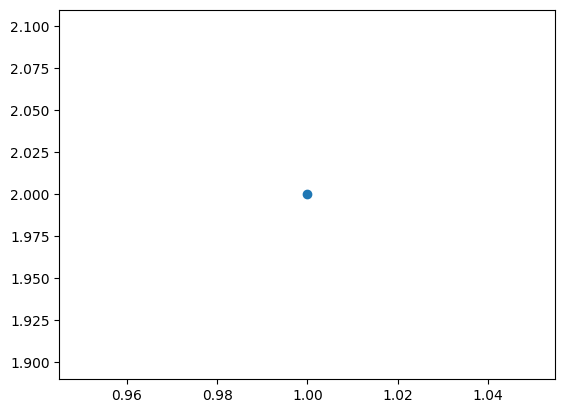

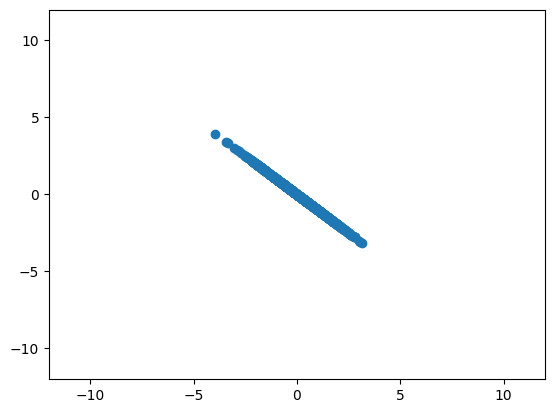

In [58]:
#Fill in below to generate a scatter plot of the first two dimensions of x samples
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])
#plt.scatter()

#Fill in below to generate a scatter plot of the first two dimensions of x_noiseless samples
#plt.scatter()
fig01, ax01 = plt.subplots()
ax01.scatter(X_noiseless[:,0], X_noiseless[:,1])

plt.ylim([-12,12])
plt.xlim([-12,12])

d) To make this more clearly connected to neuroscience, let's assume each of these samples was taken over the course of 2000 time points. Plot the latent and the first two dimensions of $x$ (the 'activity of two neurons') by filling in the below code

[]

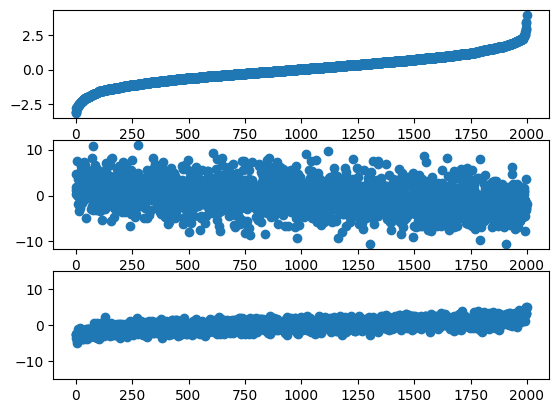

In [8]:
#Fill in below to plot latent

plt.subplot(3,1,1)
plt.scatter(np.arange(len(z)), z)
plt.plot()

#Fill in below to plot first dimension of x

plt.subplot(3,1,2)
plt.scatter(np.arange(X.shape[0]), X[:,0])
plt.plot()

#Fill in below to plot second dimension of x
plt.subplot(3,1,3)
plt.scatter(np.arange(X.shape[0]), X[:,1])
plt.ylim([-15,15])
plt.plot()



e) Fit a factor analysis model with 1 latent to the data, using sci-kit learn, and get the fit latent (we'll be plotting this latent later). Note that the package, FactorAnalysis, has already been imported

In [9]:
fa = FactorAnalysis(n_components = 1)
fa_latents = fa.fit_transform(X)

f) Print the model's loadings (components_) and noise (noise_variance_) to check that they're approximately the same as the model you generated the data from.

In [10]:
print(fa.components_)
print(fa.noise_variance_)

[[-1.04309334  0.99986088  2.00633729]]
[9.20776844 1.03101546 1.10512067]


g) Fit a PCA model to the data. You can also use sci-kit learn. Print the loadings (components_) to see how this differs from factor analysis

In [11]:
pca = PCA(n_components=3)
pca_latents = pca.fit_transform(X)
print(pca.components_)

[[ 0.91273322 -0.17648319 -0.36847219]
 [ 0.40851322  0.40729361  0.81684078]
 [-0.0059177   0.89608348 -0.44384612]]


h) Replot the scatter plot from (c). We will now overlay a line with the FA loading axis and a line with the PCA loading axis (just the first two dimensions of those).

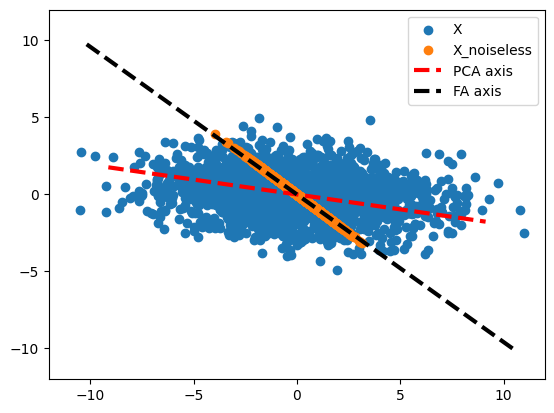

In [12]:
#Fill in below to generate a scatter plot of the first two dimensions of x samples
plt.scatter(X[:,0], X[:,1])

#Fill in below to generate a scatter plot of the first two dimensions of x_noiseless samples
plt.scatter(X_noiseless[:,0], X_noiseless[:,1])

#This will plot the axes of the PCA and FA components_ (loading axes)
plt.plot([-10*pca.components_[0][0],10*pca.components_[0][0]],[-10*pca.components_[0][1],10*pca.components_[0][1]],'r--',linewidth=3)
plt.plot([-10*fa.components_[0][0],10*fa.components_[0][0]],[-10*fa.components_[0][1],10*fa.components_[0][1]],'k--',linewidth=3)

plt.ylim([-12,12])
plt.xlim([-12,12])

#This will add a legend
plt.legend(['X','X_noiseless','PCA axis','FA axis'])

i) Explain in words, in the cell below, why the loadings for PCA and FA are different

PCA essentially is just finding 3 orthogonal axis that explains naximize variance, thus the first axis is just the axis that captures most of the variance. However, when fitting factor analysis, it assumes that all the points are generated by gaussian emission of a single latent, thus the loadings of the latent aren't just the axis that captures the most variance, since the learned noise term "accounts" for the variance of each axis. 

# FA accounts of private noise model

j) Plot the ground truth latent, and the recovered latent via FA, overlaid

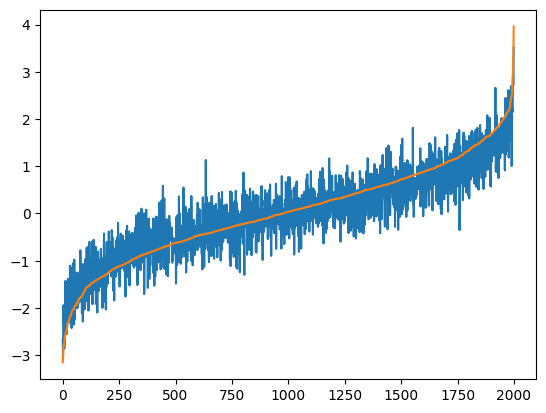

In [13]:
#Fill in below to plot the latent recovered from factor analysis
plt.plot(fa_latents)

#Fill in below to plot the ground truth latent
plt.plot(z)

k) Plot the ground truth latent and the recovered latent via PCA, overlaid

In [14]:
X.shape

(2000, 3)

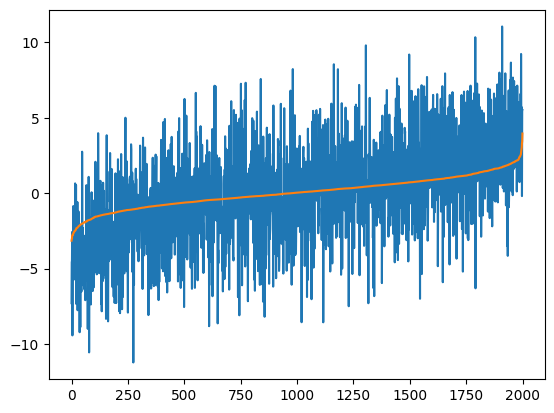

In [15]:
#Fill in below to plot the latent recovered from PCA
#Note that, by chance, the PCA axes in this example are flipped relative to the ground truth
#(this is a model degeneracy, where both the latents and axes can be flipped and we get an equal result)
#Therefore, actually plot the negative of the recovered latent from PCA below for a better match to the ground truth
plt.plot(-pca_latents[:,0])

#Fill in below to plot the ground truth latent
plt.plot(z)

L) Explain in words, in the cell below, why PCA's estimate of the latent are so inaccurate relative to FA. In particular, consider which dimensions are being most heavily utilized to estimate the latent.

PCA simply finds the axis that maximizes variance, thus the noisiest axis dominates the latent. Instead, FA tries to find a single latent that captures the covariance structure underlying the data, and finds a separate noise term that "accounts" for the noisiest axis.

m) While you were able to use sci-kit learn for factor analysis rather than fully implementing EM, let's just do the "E" step here using the final model parameters found with sci-kit learn (fa.noise_variance_ and fa.components_). That is, find p(z|x), using the equation shown in class. You can just find the mean here and not worry about the variance.<br>

Then, create a scatter plot of the latent estimated manually, versus the latent directly output from sci-kit learn. If the above calculations were correct, this should be a diagonal line.

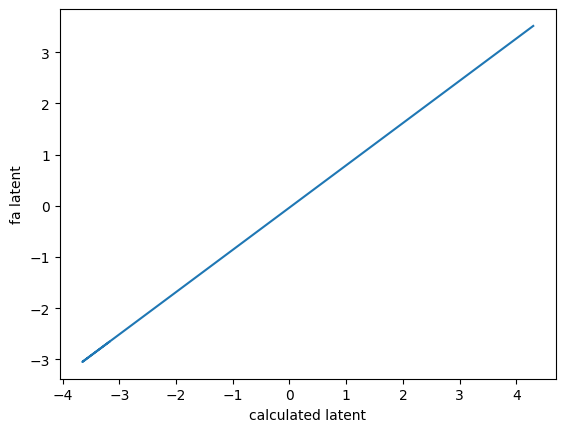

In [44]:
#Fill in code below to find p(z|x)
fa_chi = np.diag(fa.noise_variance_)
w = fa.components_.T

delta = np.linalg.inv(w.T@np.linalg.inv(fa_chi)@w)
calc_latent = X@(delta @ w.T @ np.linalg.inv(fa_chi)).T

fig, ax = plt.subplots()
ax.set_xlabel('calculated latent')
ax.set_ylabel('fa latent')
ax.plot(calc_latent, fa_latents)


#Fill in code below to create a scatter plot of the latent estimated above, versus the latent output from sci-kit learn (from part e)
#plt.scatter()

n) The above showed pretty large differences between factor analysis and PCA to demonstrate how they differ, but for most neural datasets, the difference is more minor. <br><br> Re-run the above with FA vs PCA comparison on data generated with the following, less extreme, noise model:
$\Psi = \begin{bmatrix} 2 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$
<br>
Just output the same plot as in (h)

And by re-run, I mean copy-paste your code from a,b,e,g,h (while changing $\Psi$) into your cell below, so you don't overwrite your previous results.

In [45]:
#Set the random seed so we get the same results every time
np.random.seed(1)

#Fill in below to generate samples of the latent
z = np.random.normal(loc=0, scale=1, size=2000)
W = np.array([-1,1,2])
chi = np.array([[2,0,0], [0,1,0], [0,0,1]])
noise = multivariate_normal(mean=[0,0,0], cov=chi, size=(2000))
X_noiseless = z.reshape(-1,1) @ W.reshape(1,3)
X = X_noiseless + noise


In [46]:
pca = PCA(n_components=3)
pca_latents = pca.fit_transform(X)
fa = FactorAnalysis(n_components = 1)
fa_latents = fa.fit_transform(X)

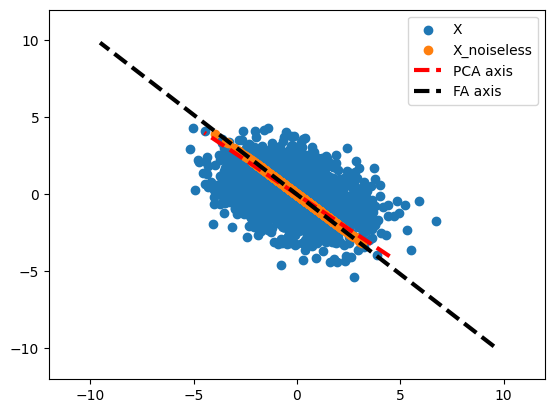

In [47]:
#Fill in below to generate a scatter plot of the first two dimensions of x samples
plt.scatter(X[:,0], X[:,1])

#Fill in below to generate a scatter plot of the first two dimensions of x_noiseless samples
plt.scatter(X_noiseless[:,0], X_noiseless[:,1])

#This will plot the axes of the PCA and FA components_ (loading axes)
plt.plot([-10*pca.components_[0][0],10*pca.components_[0][0]],[-10*pca.components_[0][1],10*pca.components_[0][1]],'r--',linewidth=3)
plt.plot([-10*fa.components_[0][0],10*fa.components_[0][0]],[-10*fa.components_[0][1],10*fa.components_[0][1]],'k--',linewidth=3)

plt.ylim([-12,12])
plt.xlim([-12,12])

#This will add a legend
plt.legend(['X','X_noiseless','PCA axis','FA axis'])

## 2) Gaussian Processes

I have provided a function for a radial basis function kernel below

In [48]:
#In the below function, x is a vector of datapoints, and L (the lengthscale) is a scalar

def cov_RBF(x,L):
  cov_rbf = np.exp(-(x-x.T)**2/(2*L**2))
  return cov_rbf

a) Let's say our datapoints have values 1,2,...,399,400 (e.g. these are the values of timepoints).  Plot (imshow) the RBF covariance for those values, for lengthscale=100 and lengthscale=1. Fill in the missing code below to do so.

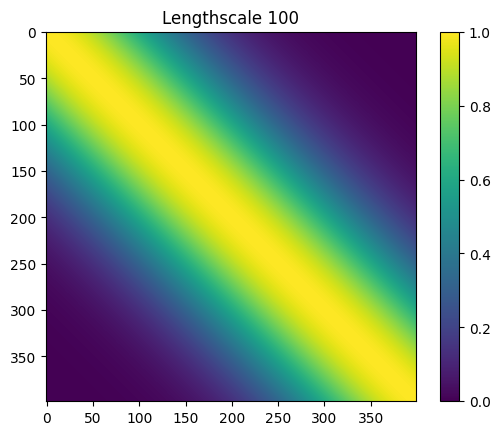

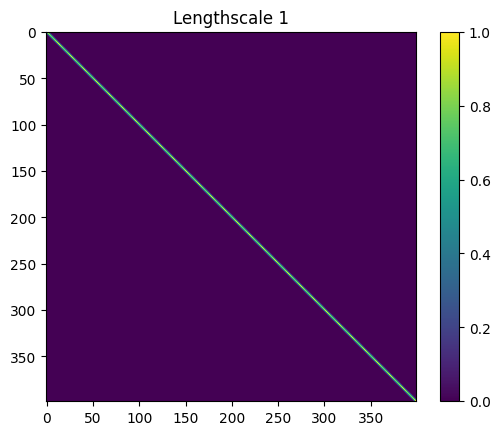

In [49]:
#Datapoints X
X = np.arange(1,400)[None,:]

#Fill in below to generate the RBF kernel for lengthscale=100
scale1=100
K_rbf1 = cov_RBF(X, scale1)

#Plot the image
plt.figure()
plt.imshow(K_rbf1,clim=[0,1])
plt.title('Lengthscale 100')
plt.colorbar()

#Fill in below to generate the RBF kernel for lengthscale=1
scale2=1
K_rbf2 = cov_RBF(X, scale2)

#Plot the image
plt.figure()
plt.imshow(K_rbf2,clim=[0,1])
plt.title('Lengthscale 1')
plt.colorbar()

b) For both of the above RBF covariance functions, sample datapoints from the multivariate normal distribution with mean 0 and those covariances. Plot both of these samples. Note that the result will be 400 datapoints. As a hint, the means that you input into the multivariate_normal function will need to be arrays with 400 zeros.

Text(0.5, 1.0, 'GP Sample for lengthscale=1')

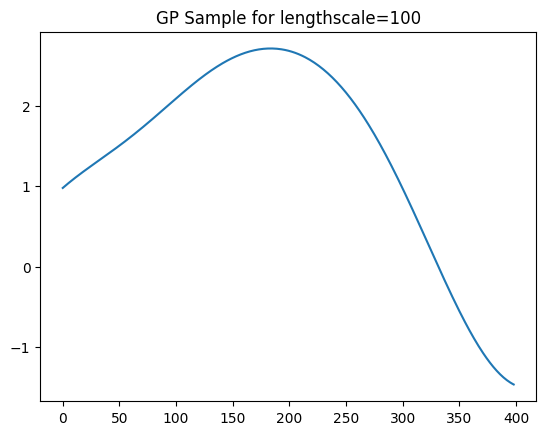

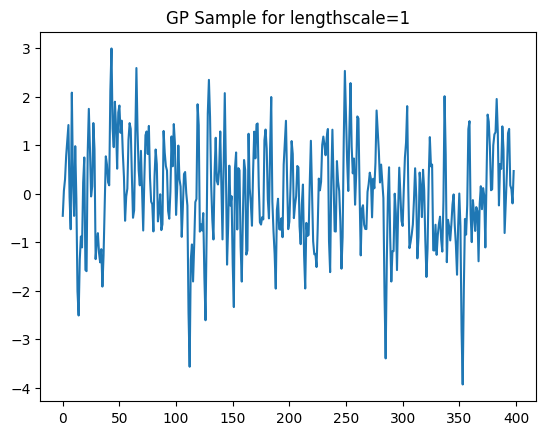

In [53]:
#Fill in below to generate mean of distributions
#mu=
#noise = multivariate_normal(mean=[0,0,0], cov=chi, size=(2000))
#Fill in below to generate samples from the above mean and the covariance of an RBF kernel with lengthscale 100 (from above)
sample1 = np.random.multivariate_normal(mean=np.zeros(399), cov=K_rbf1)
#Fill in below to generate samples from the above mean and the covariance of an RBF kernel with lengthscale 1 (from above)
sample2 = np.random.multivariate_normal(mean=np.zeros(399), cov=K_rbf2)

#Plot the samples
plt.figure()
plt.plot(sample1)
plt.title('GP Sample for lengthscale=100')

plt.figure()
plt.plot(sample2)
plt.title('GP Sample for lengthscale=1')

Explain in words how the differences in the covariance functions in (a) (for different scale parameters) explain the differences in the samples from the distributions (b)

Essentially the the higher the length scale, the more future and past timepoints covary with the currently sampled timepoint. This will make close-by samples have higher probability to have similar values, leading to smoother plots